<a href="https://colab.research.google.com/github/felisbrightus/229352-StatisticalLearning/blob/main/660510771_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

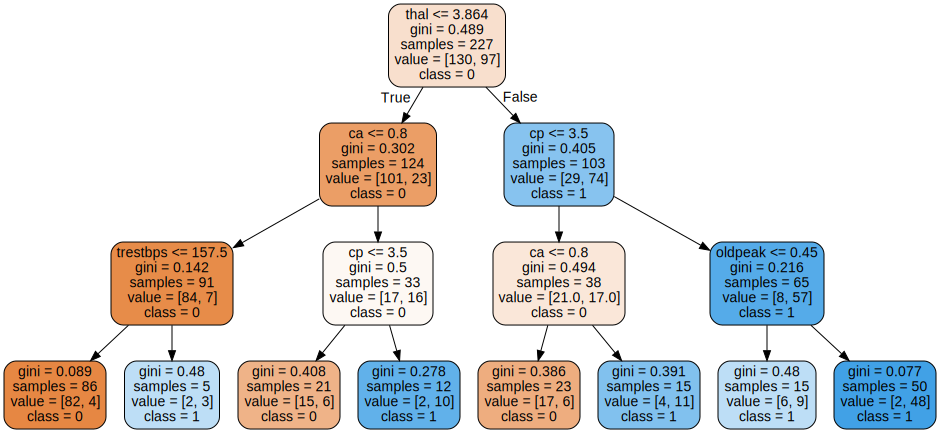

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(estimator=clf, n_estimators=100, max_samples=0.8)
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        34
           1       0.85      0.69      0.76        42

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.78      0.76      0.76        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [ ]:
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        34
           1       0.86      0.71      0.78        42

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.78      0.78        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

Decision tree

In [ ]:
## Decision Tree
dt_pipeline = Pipeline([('imputer', imputer), ('dt', DecisionTreeClassifier())])
dt_params = {'dt__max_depth': [3, 6, 9, 12],
             'dt__min_samples_split': [2, 5, 10],
             'dt__min_samples_leaf': [1, 2, 4]}

# Grid Search CV
dt_gridcv = GridSearchCV(dt_pipeline, dt_params, scoring=['f1_macro', 'accuracy'], refit='f1_macro', cv=5)
dt_gridcv.fit(X_train, y_train)

# Predict test set
dt_best_model = dt_gridcv.best_estimator_
dt_predictions = dt_best_model.predict(X_test)

# f1, accuracy
dt_f1 = f1_score(y_test, dt_predictions, average='macro')
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Best hyperparameters: {dt_gridcv.best_params_}")
print(f"Test f1_macro score: {dt_f1:.4f}")
print(f"Test accuracy score: {dt_accuracy:.4f}")

Best hyperparameters: {'dt__max_depth': 3, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
Test f1_macro score: 0.8550
Test accuracy score: 0.8553


Bagged decision trees

In [ ]:
## Bagged Decision Trees
bagging_pipeline = Pipeline([('imputer', imputer), ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier()))])
bagging_params = {'bagging__n_estimators': [50, 100, 200],
                  'bagging__max_samples': [0.5, 0.8, 1.0],
                  'bagging__max_features': [0.5, 0.8, 1.0]}

# Grid Search CV
bagging_gridcv = GridSearchCV(bagging_pipeline, bagging_params, scoring=['f1_macro', 'accuracy'], refit='f1_macro', cv=5)
bagging_gridcv.fit(X_train, y_train)

# Predict test set
bagging_best_model = bagging_gridcv.best_estimator_
bagging_predictions = bagging_best_model.predict(X_test)

# f1, accuracy
bagging_f1 = f1_score(y_test, bagging_predictions, average='macro')
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

print(f"Best hyperparameters: {bagging_gridcv.best_params_}")
print(f"Test f1_macro score: {bagging_f1:.4f}")
print(f"Test accuracy score: {bagging_accuracy:.4f}")

Best hyperparameters: {'bagging__max_features': 0.5, 'bagging__max_samples': 1.0, 'bagging__n_estimators': 200}
Test f1_macro score: 0.8158
Test accuracy score: 0.8158


Random forest

In [ ]:
# Random Forest
forest_pipeline = Pipeline([('imputer', imputer), ('forest', RandomForestClassifier())])
forest_params = {'forest__n_estimators': [50, 100, 200],  #จำนวนต้นไม้ทั้งหมด
                 'forest__max_depth': [3, 6, 9, 12],      #ความลึกสูงสุดของแต่ละต้นไม้
                 'forest__min_samples_split': [2, 5, 10]} #จำนวนตัวอย่างขั้นต่ำที่ต้องมีเพื่อแยก node ใหม่

# Grid Search CV
forest_gridcv = GridSearchCV(forest_pipeline, forest_params, scoring=['f1_macro', 'accuracy'], refit='f1_macro', cv=5)
forest_gridcv.fit(X_train, y_train)

# Predict test set
forest_best_model = forest_gridcv.best_estimator_
forest_predictions = forest_best_model.predict(X_test)

# f1, accuracy
forest_f1 = f1_score(y_test, forest_predictions, average='macro')
forest_accuracy = accuracy_score(y_test, forest_predictions)

print(f"Best hyperparameters: {forest_gridcv.best_params_}")
print(f"Test f1_macro score: {forest_f1:.4f}")
print(f"Test accuracy score: {forest_accuracy:.4f}")

Best hyperparameters: {'forest__max_depth': 3, 'forest__min_samples_split': 2, 'forest__n_estimators': 200}
Test f1_macro score: 0.7895
Test accuracy score: 0.7895


In [ ]:
results = pd.DataFrame({'Model': ['Decision Tree', 'Bagged Trees', 'Random Forest'],
                        'Accuracy': [dt_accuracy, bagging_accuracy, forest_accuracy],
                        'F1 Macro': [dt_f1, bagging_f1, forest_f1]})
results

,Model,Accuracy,F1 Macro
0,Decision Tree,0.855263,0.855037
1,Bagged Trees,0.815789,0.815789
2,Random Forest,0.789474,0.789474


What is your best model?

In [ ]:
best_model_name = results.loc[results['F1 Macro'].idxmax(), 'Model']
print(f"Best model based on F1-macro: {best_model_name}")

Best model based on F1-macro: Decision Tree


Plot the best tree model

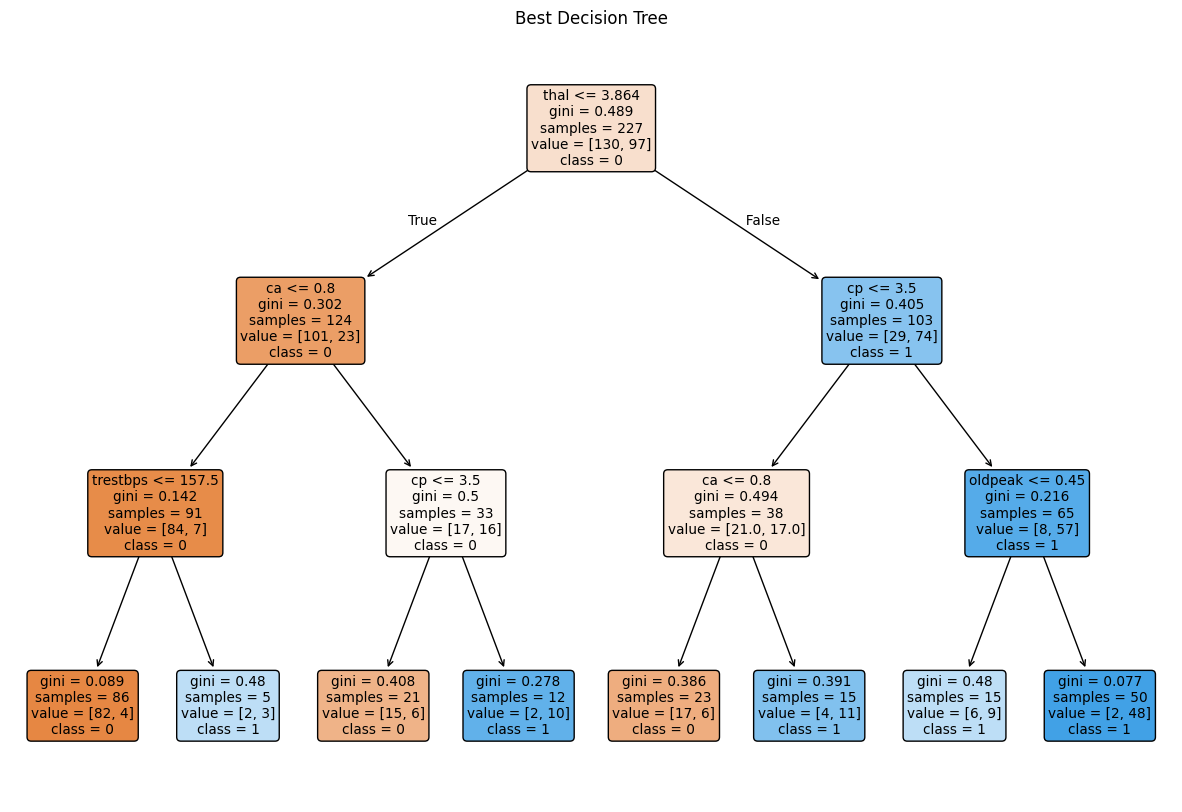

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(
    dt_best_model.named_steps['dt'],
    feature_names=X.columns.tolist(),
    class_names=['0', '1'],
    filled=True,
    rounded=True
)
plt.title("Best Decision Tree")
plt.show()

What hyperparameters did you choose?

1. dt__max_depth :ความลึกสูงสุดของต้นไม้ (จำกัดไม่ให้โมเดลซับซ้อนเกินไป)


*   หากตั้งค่าสูงเกินไป อาจทำให้เกิดการเรียนรู้มากเกิน (overfitting)
*   หากตั้งค่าต่ำเกินไป อาจทำให้โมเดลเรียนรู้ไม่เพียงพอ (underfitting)

2. dt__min_samples_split :จำนวนตัวอย่างขั้นต่ำที่จำเป็นเพื่อแบ่ง node (ช่วยควบคุมไม่ให้ต้นไม้แตก node โดยไม่จำเป็น)


*   ค่าน้อยเกินไป อาจเสี่ยงต่อการ overfit
*   ค่าสูงเกินไป อาจทำให้โมเดล underfit


3. dt__min_samples_leaf :จำนวนตัวอย่างขั้นต่ำในใบไม้แต่ละใบ (ควบคุม คุณภาพของคำตอบใน node ปลายทาง)


*   ค่าน้อยเกินไป อาจนำไปสู่การ overfitting
*   ค่าสูงเกินไป อาจทำให้เกิด underfitting


What are the best values of your hyperparameters?

In [ ]:
print("Best hyperparameters for Decision Tree:")
print(dt_gridcv.best_params_)
print("\nBest hyperparameters for Bagged Decision Trees:")
print(bagging_gridcv.best_params_)
print("\nBest hyperparameters for Random Forest:")
print(forest_gridcv.best_params_)

Best hyperparameters for Decision Tree:
{'dt__max_depth': 3, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}

Best hyperparameters for Bagged Decision Trees:
{'bagging__max_features': 0.5, 'bagging__max_samples': 1.0, 'bagging__n_estimators': 200}

Best hyperparameters for Random Forest:
{'forest__max_depth': 3, 'forest__min_samples_split': 2, 'forest__n_estimators': 200}
